<a href="https://colab.research.google.com/github/atcodedog32/WiDS__Datathon_ML/blob/master/wids_2020_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import matplotlib.pyplot as plt
#from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
pd.set_option('max_rows', 500)
import re


In [0]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 102kB 3.2MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip '/content/gdrive/My Drive/widsdatathon2020/wids2020data/training_v2.csv.zip'
!unzip '/content/gdrive/My Drive/widsdatathon2020/wids2020data/test.zip'

Archive:  /content/gdrive/My Drive/widsdatathon2020/wids2020data/training_v2.csv.zip
replace training_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /content/gdrive/My Drive/widsdatathon2020/wids2020data/test.zip
replace unlabeled.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
train = pd.read_csv('training_v2.csv')
train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,...,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [0]:
test = pd.read_csv('unlabeled.csv')
test = test.drop('hospital_death',axis = 1)

In [0]:
test.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating Room / Recovery,1043,admit,Med-Surg ICU,0.230556,0,41.0,NaN,217.0,1502.02,1,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,66.0,32.518596,1,African American,M,170.2,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.140972,0,94.2,NaN,302.0,1208.06,1,0.0,NaN,22.0,1.84,NaN,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,NaN,NaN,NaN,NaN,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,64.0,20.798520,0,Caucasian,M,182.8,Operating Room,Operating Room / Recovery,1078,admit,Med-Surg ICU,0.002083,0,69.5,1.9,303.0,211.03,0,0.0,0.8,24.0,0.75,0.7,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,36.0,36.0,142.0,7.35,30.0,...,1.4,1.4,NaN,NaN,248.0,248.0,4.0,4.0,133.0,133.0,9.7,9.7,36.0,36.0,7.37,7.35,142.0,57.0,202.857143,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,56.0,NaN,0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,1012,admit,Neuro ICU,0.004861,0,66.4,NaN,217.0,1501.01,1,0.0,NaN,11.0,0.52,NaN,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,NaN,NaN,NaN,NaN,5.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [0]:
train.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [0]:
train.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [0]:
rem_nan = train.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

#print(res) #train_enc_features = MultiColumnLabelEncoder(columns = ['ethnicity',	'gender',	'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type',	'apache_3j_bodysystem',	'apache_2_bodysystem']).fit_transform(rem_nan)

In [0]:
#train_rem_nan = train.fillna( value= 0 , method=None, axis=None, inplace=False, limit=None, downcast=None) 

In [0]:
#train_rem_nan.isnull().sum()

In [0]:
#train_rem_nan.dtypes

In [0]:
rem_nan.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,0.0,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,0.0,108.0,203.01,0,0.0,0.0,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,0.0,122.0,703.03,0,0.0,0.0,0.0,0.00,0.0,3.0,6.0,0.0,5.0,0.0,102.0,0.0,0.0,68.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,0.0,203.0,1206.03,1,0.0,0.0,0.0,0.00,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,...,1.6,1.1,0.0,0.0,43.0,43.0,0.0,0.0,0.0,0.0,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,0.00,0,Caucasian,M,188.0,.,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,0.0,0.0,119.0,601.01,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,103.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [0]:
rem_nan.select_dtypes( include=object, exclude=None)

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,.,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [0]:
categorical_cols= ['ethnicity',	'gender',	'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type',	'apache_3j_bodysystem',	'apache_2_bodysystem']

In [0]:
Categorical_features = rem_nan[categorical_cols]

In [0]:
Categorical_features.head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,.,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma


In [0]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
train_enc_features = MultiColumnLabelEncoder(columns = ['ethnicity',	'gender',	'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type',	'apache_3j_bodysystem',	'apache_2_bodysystem']).fit_transform(rem_nan)

In [0]:
train_enc_features.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,3,2,180.3,5,2,92,0,2,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,0.0,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10,1
1,114252,59342,81,0,77.0,27.42,0,3,1,160.0,5,2,90,0,5,0.927778,0,70.2,0.0,108.0,203.01,0,0.0,0.0,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,7
2,119783,50777,118,0,25.0,31.95,0,3,1,172.7,4,1,93,0,5,0.000694,0,95.3,0.0,122.0,703.03,0,0.0,0.0,0.0,0.00,0.0,3.0,6.0,0.0,5.0,0.0,102.0,0.0,0.0,68.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,4
3,79267,46918,118,0,81.0,22.64,1,3,1,165.1,9,3,92,0,2,0.000694,0,61.7,0.0,203.0,1206.03,1,0.0,0.0,0.0,0.00,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,...,1.6,1.1,0.0,0.0,43.0,43.0,0.0,0.0,0.0,0.0,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,92056,34377,33,0,19.0,0.00,0,3,2,188.0,0,1,91,0,5,0.073611,0,0.0,0.0,119.0,601.01,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,103.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,8


In [0]:
#from sklearn import preprocessing 
#from sklearn.preprocessing import LabelEncoder
#le = preprocessing.LabelEncoder()
#train_encoded_features=train_rem_nan.astype(str).apply(le.fit_transform)

In [0]:
#Categorical_features.apply(LabelEncoder().fit_transform)

In [0]:
train_enc_features.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                          int64
gender                             int64
height                           float64
hospital_admit_source              int64
icu_admit_source                   int64
icu_id                             int64
icu_stay_type                      int64
icu_type                           int64
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

Class 0: 83798
Class 1: 7915
Proportion: 10.59 : 1


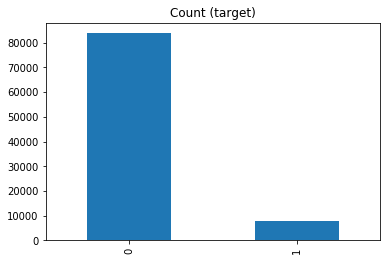

In [0]:
target_count = train_enc_features.hospital_death.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

under sampling

In [0]:
# Class count
count_class_0, count_class_1 = train_enc_features.hospital_death.value_counts()

# Divide by class
df_class_0 = train_enc_features[train_enc_features['hospital_death'] == 0]
df_class_1 = train_enc_features[train_enc_features['hospital_death'] == 1]

Random under-sampling:
1    7915
0    7915
Name: hospital_death, dtype: int64


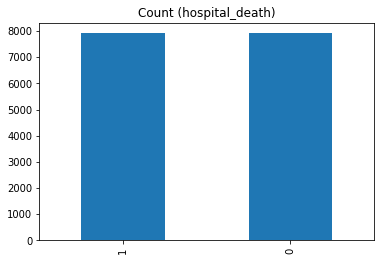

In [0]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.hospital_death.value_counts())

df_train_under.hospital_death.value_counts().plot(kind='bar', title='Count (hospital_death)');

In [0]:
train_enc_features.shape

(91713, 186)

In [0]:
df_train_under.shape

(15830, 186)

creating feature and target set

In [0]:
hospital_death = train_encoded_features['hospital_death']  #moving target to end
train_encoded_features.drop(labels=['hospital_death'], axis=1,inplace = True)
train_encoded_features.insert(185, 'hospital_death', hospital_death)
train_encoded_features.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,65400,33644,14,53,7132,0,3,2,308,5,2,230,0,2,1308,0,2422,12,12,324,0,0,27,215,411,0,3,6,0,4,69,19,113,0,102,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,6,0,0,1,0,0,0,0,0,10,1,0
1,11089,60179,131,62,14610,0,3,1,128,5,2,218,0,5,1863,0,2267,0,8,242,0,0,0,449,48,82,1,3,0,1,46,21,208,0,108,187,187,1516,426,28,...,41,340,333,478,479,47,48,81,93,278,279,235,220,363,521,1898,1333,4423,4090,247,234,454,476,1239,1254,2565,2568,48,30,0,0,1,0,0,0,0,0,9,7,0
2,15383,53370,14,10,21362,0,3,1,241,4,1,236,0,5,529,0,3252,0,21,367,0,0,0,0,0,0,3,6,0,5,0,3,0,0,130,0,0,0,0,35,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,4,0
3,75625,50379,14,66,6978,1,3,1,176,9,3,230,0,2,529,0,1937,0,25,70,1,0,0,0,0,47,4,6,0,5,86,15,98,1,122,117,117,348,366,38,...,21,0,0,354,354,0,0,0,0,1962,1959,235,120,353,411,1413,20,3070,2036,237,194,374,366,860,695,1823,1837,5,4,0,0,0,0,0,0,0,0,1,1,0
4,85526,40679,92,4,0,0,3,2,372,0,1,226,0,5,634,0,0,0,18,325,0,0,0,0,0,0,0,0,0,0,0,110,0,0,4,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,11,8,0


In [0]:
X = train_encoded_features.iloc[:, 0:185].values  #features
y = train_encoded_features.iloc[:, 185].values    #target

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

alternate way of creating feature and target set

In [0]:
X_train_2 = df_train_under.drop("hospital_death",axis=1)
Y_train_2 = df_train_under["hospital_death"]
#X_test_2  = test_df.drop("PassengerId",axis=1).copy()

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
#X_test = sc.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[16530   142]
 [ 1288   383]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16672
           1       0.73      0.23      0.35      1671

    accuracy                           0.92     18343
   macro avg       0.83      0.61      0.65     18343
weighted avg       0.91      0.92      0.90     18343

0.9220411055988661


preprocess test dataset into trained format

In [0]:
test.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating Room / Recovery,1043,admit,Med-Surg ICU,0.230556,0,41.0,NaN,217.0,1502.02,1,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,66.0,32.518596,1,African American,M,170.2,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.140972,0,94.2,NaN,302.0,1208.06,1,0.0,NaN,22.0,1.84,NaN,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,NaN,NaN,NaN,NaN,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,64.0,20.798520,0,Caucasian,M,182.8,Operating Room,Operating Room / Recovery,1078,admit,Med-Surg ICU,0.002083,0,69.5,1.9,303.0,211.03,0,0.0,0.8,24.0,0.75,0.7,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,36.0,36.0,142.0,7.35,30.0,...,1.4,1.4,NaN,NaN,248.0,248.0,4.0,4.0,133.0,133.0,9.7,9.7,36.0,36.0,7.37,7.35,142.0,57.0,202.857143,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,56.0,NaN,0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,1012,admit,Neuro ICU,0.004861,0,66.4,NaN,217.0,1501.01,1,0.0,NaN,11.0,0.52,NaN,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,NaN,NaN,NaN,NaN,5.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [0]:
test.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache                       float64
creatinine_apach

In [0]:
rem_nan_test = test.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

#print(res)

In [0]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
#test_encoded_features=test.astype(str).apply(le.fit_transform)

In [0]:
test_enc_features = MultiColumnLabelEncoder(columns = ['ethnicity',	'gender',	'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type',	'apache_3j_bodysystem',	'apache_2_bodysystem']).fit_transform(rem_nan_test)

In [0]:
test_enc_features.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,56.0,21.102439,0,3,2,180.3,4,1,1105,0,6,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,0.0,19.0,0.67,0.0,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,0.0,0.0,0.0,0.00,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5
1,5,130737,178,0.0,19.500595,1,3,1,145.0,8,3,1043,0,5,0.230556,0,41.0,0.0,217.0,1502.02,1,0.0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,4.0,0.0,60.0,0.0,0.0,53.0,0.0,0.0,0.0,0.00,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5
2,7,101458,86,66.0,32.518596,1,1,2,170.2,8,3,1035,0,0,0.140972,0,94.2,0.0,302.0,1208.06,1,0.0,0.0,22.0,1.84,0.0,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,0.0,0.0,0.0,0.00,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,8,48067,163,64.0,20.798520,0,3,2,182.8,8,3,1078,0,5,0.002083,0,69.5,1.9,303.0,211.03,0,0.0,0.8,24.0,0.75,0.7,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,36.0,36.0,142.0,7.35,30.0,...,1.4,1.4,0.0,0.0,248.0,248.0,4.0,4.0,133.0,133.0,9.7,9.7,36.0,36.0,7.37,7.35,142.0,57.0,202.857143,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,7
4,10,25865,59,56.0,0.000000,0,3,2,0.0,4,1,1012,0,6,0.004861,0,66.4,0.0,217.0,1501.01,1,0.0,0.0,11.0,0.52,0.0,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,0.0,0.0,0.0,0.00,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5


Logistic regg

In [0]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train_2, Y_train_2)

Y_pred_logis = logreg.predict(test_enc_features)

logreg.score(X_train_2, Y_train_2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8009475679090334

In [0]:
#Support Vector Machines

svc = SVC()

svc.fit(X_train_2, Y_train_2)

Y_pred_svm = svc.predict(test_encoded_features)

svc.score(X_train_2, Y_train_2)


In [0]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=5)

random_forest.fit(X_train_2, Y_train_2)

Y_pred_rf = random_forest.predict(test_enc_features)

random_forest.score(X_train_2, Y_train_2)

1.0

In [0]:
random_forest.get_params,random_forest.feature_importances_

(<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=5,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=True, random_state=None,
                        verbose=0, warm_start=False)>,
 array([6.00101811e-03, 6.18701167e-03, 5.33234628e-03, 9.15189582e-03,
        7.30043499e-03, 4.00804614e-03, 1.70964068e-03, 9.81459804e-04,
        5.35597007e-03, 3.08273575e-03, 2.91943982e-03, 6.13468688e-03,
        6.70174526e-04, 2.77703971e-03, 7.59111284e-03, 0.00000000e+00,
        6.74543717e-03, 3.44029889e-03, 1.07485486e-02, 1.25879018e-02,
        2.70340040e-03, 3.53099284e-04, 4.02742

In [0]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# Gradient Boosts
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train_2, Y_train_2)
Y_pred_gb = grad_boost.predict(test_enc_features)
grad_boost.score(X_train_2, Y_train_2)

0.9364497789008213

In [0]:
submission = pd.DataFrame({
        "encounter_id": test_enc_features["encounter_id"],
        "hospital_death": Y_pred_gb
    })
submission.to_csv('submission_gb_under.csv', index=False)